# Data Visualization Exercise
Author: J. Tyler Bittner

Assignment:

> For the Data Visualization portion, find a dataset and create 4 to 5 visualizations in two ways. First, have static visual representations of your data then use Bokeh with the same data. Please provide a write up on the pros and cons of static vs dynamic representations of your data. Please commit your work to GitHub.

## Data  Set
For this exercise the data set I'm using is [HCCI’s 2016 Health Care Cost and Utilization Report](https://www.healthcostinstitute.org/data) saved as [Machine Readable Data 2016 HCCUR.csv](datasets/HCCI’s 2016 Health Care Cost and Utilization Report - Machine readable data/Machine Readable Data 2016 HCCUR.csv).

The variables and dimentions they're measured on are described in the [HCCI data description doc](datasets/HCCI’s 2016 Health Care Cost and Utilization Report - Machine readable data/Machine Readable Data Documentation 2016 HCCUR.pdf).


## [My Steps:]
1. [DONE] Link to data set source
1. [DONE] Load data via pandas
1. [DONE] Go thru Lauren's data viz notebook
1. Initial data set examination & cleanup - decide what to visualize; what story to tell
   1. quick review of tidy data principles re: variables/metrics/whatevs -- rows/columns
   1. [DONE] re-read data dictionary to understand metrics & values
   1. [DONE] Set categorical column types if necessary
   1. [DONE] Plot category freqs w/ sns.countplot()
1. Cleanup:
   - Null 'Mid-Level Category' and 'Subcategory'
1. Create static vizes -- explore what's best
1. Create dynamic vizes of same data with Bokeh
1. Draft write up on the pros and cons of static vs dynamic representations
1. Revise/clean up whole thing
1. Commit to github

# Exploratory Data Analysis & Cleanup

In [805]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Set defaults
plt.rcParams['figure.figsize'] = (20, 10)

In [806]:
df = pd.read_csv(os.path.join('datasets', 
                                    'HCCI’s 2016 Health Care Cost and Utilization Report - Machine readable data', 
                                    'Machine Readable Data 2016 HCCUR.csv'))
df.rename(columns={'HCCI_HL_CATEGORY': 'High-Level Category',
          'HCCI_ML_CATEGORY': 'Mid-Level Category',
          'HCCI_SUBCATEGORY': 'Subcategory',
          'AGE_GROUP': 'Age Group',
          'GENDER': 'Gender',
          'METRIC': 'Metric',
          'YEAR': 'Year',
          'VALUE': 'Value'},
          inplace=True)
# df['High-Level Category'] = df['High-Level Category'].astype('category')
# df['Mid-Level Category'] = df['Mid-Level Category'].astype('category')
# df['Subcategory'] = df['Subcategory'].astype('category')
# df['Age Group'] = df['Age Group'].astype('category')
# df['Metric'] = df['Metric'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28140 entries, 0 to 28139
Data columns (total 8 columns):
High-Level Category    28140 non-null object
Mid-Level Category     28140 non-null object
Subcategory            26070 non-null object
Age Group              28140 non-null object
Gender                 28140 non-null object
Metric                 28140 non-null object
Year                   28140 non-null int64
Value                  28140 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.7+ MB


In [807]:
df.head()

,High-Level Category,Mid-Level Category,Subcategory,Age Group,Gender,Metric,Year,Value
0,Inpatient,inpatient_acute,Labor_Delivery,All,All,OOP_spending_per_person,2012,10.0975
1,Inpatient,inpatient_acute,Labor_Delivery,All,All,OOP_spending_per_person,2013,12.3736
2,Inpatient,inpatient_acute,Labor_Delivery,All,All,OOP_spending_per_person,2014,13.0115
3,Inpatient,inpatient_acute,Labor_Delivery,All,All,OOP_spending_per_person,2015,13.4226
4,Inpatient,inpatient_acute,Labor_Delivery,All,All,OOP_spending_per_person,2016,13.9617


In [808]:
# Categorical type values (non-medical related):

print('> Age Group:')
print(df['Age Group'].unique())

print('> Gender:')
print(df['Gender'].unique())

print('> Metric:')
print(df['Metric'].unique())

print('> Year:')
print(df['Year'].unique())

> Age Group:
['All' 'Ages_0to18' 'Ages_19to25' 'Ages_26to44' 'Ages_45to54' 'Ages_55to64']
> Gender:
['All' 'Female' 'Male']
> Metric:
['OOP_spending_per_person' 'Payer_spending_per_person' 'Price'
 'Spending_per_person' 'Utilization_per_1000_persons']
> Year:
[2012 2013 2014 2015 2016]


In [809]:
# Check for nulls
df.isnull().any()

High-Level Category    False
Mid-Level Category     False
Subcategory             True
Age Group              False
Gender                 False
Metric                 False
Year                   False
Value                  False
dtype: bool

In [810]:
# Drop nulls
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26070 entries, 0 to 27419
Data columns (total 8 columns):
High-Level Category    26070 non-null object
Mid-Level Category     26070 non-null object
Subcategory            26070 non-null object
Age Group              26070 non-null object
Gender                 26070 non-null object
Metric                 26070 non-null object
Year                   26070 non-null int64
Value                  26070 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.8+ MB


In [811]:
# Remove rows summarized by Age Group
df = df[df['Age Group'] != 'All']

# Remove rows summarized by Subcategory
df = df[df['Subcategory'] != 'Total']

# Convert  Age Group to be numeric for finding correlations later
df['Age Group Upper'] = df['Age Group'].str[-2:]
df['Age Group Upper'] = pd.to_numeric(df['Age Group Upper'], errors='coerce')

# Ignore gender for this exercise
df.drop('Gender', axis=1, inplace=True)
df.head(10)

,High-Level Category,Mid-Level Category,Subcategory,Age Group,Metric,Year,Value,Age Group Upper
50,Inpatient,inpatient_acute,Labor_Delivery,Ages_0to18,OOP_spending_per_person,2012,0.5951,18
51,Inpatient,inpatient_acute,Labor_Delivery,Ages_0to18,OOP_spending_per_person,2013,0.6936,18
52,Inpatient,inpatient_acute,Labor_Delivery,Ages_0to18,OOP_spending_per_person,2014,0.6324,18
53,Inpatient,inpatient_acute,Labor_Delivery,Ages_0to18,OOP_spending_per_person,2015,0.5548,18
54,Inpatient,inpatient_acute,Labor_Delivery,Ages_0to18,OOP_spending_per_person,2016,0.4927,18
55,Inpatient,inpatient_acute,Labor_Delivery,Ages_0to18,Payer_spending_per_person,2012,3.9628,18
56,Inpatient,inpatient_acute,Labor_Delivery,Ages_0to18,Payer_spending_per_person,2013,4.0448,18
57,Inpatient,inpatient_acute,Labor_Delivery,Ages_0to18,Payer_spending_per_person,2014,3.5116,18
58,Inpatient,inpatient_acute,Labor_Delivery,Ages_0to18,Payer_spending_per_person,2015,2.9669,18
59,Inpatient,inpatient_acute,Labor_Delivery,Ages_0to18,Payer_spending_per_person,2016,2.5772,18


## Categories

This data set has three types of medical categories so let's take a look at the values and frequencies.

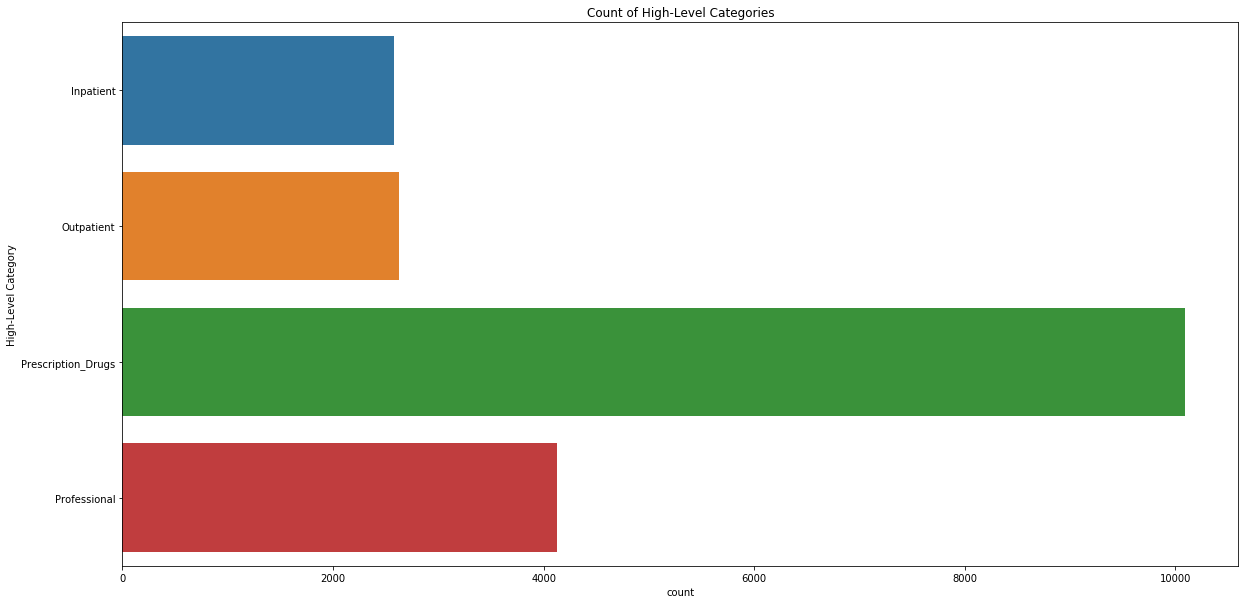

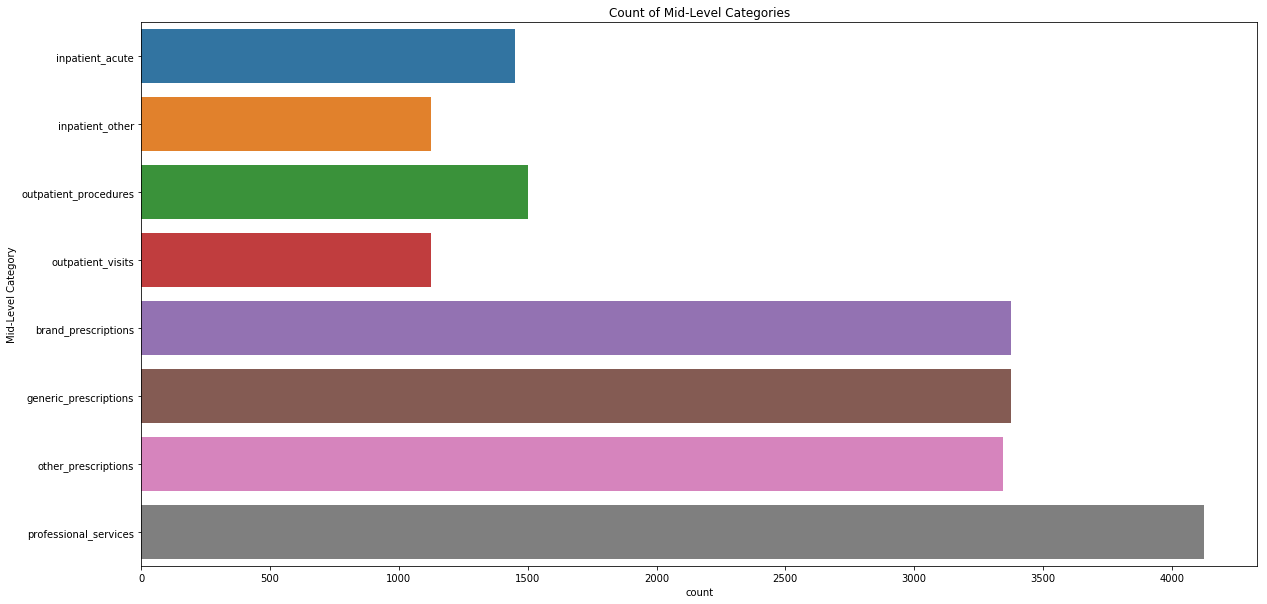

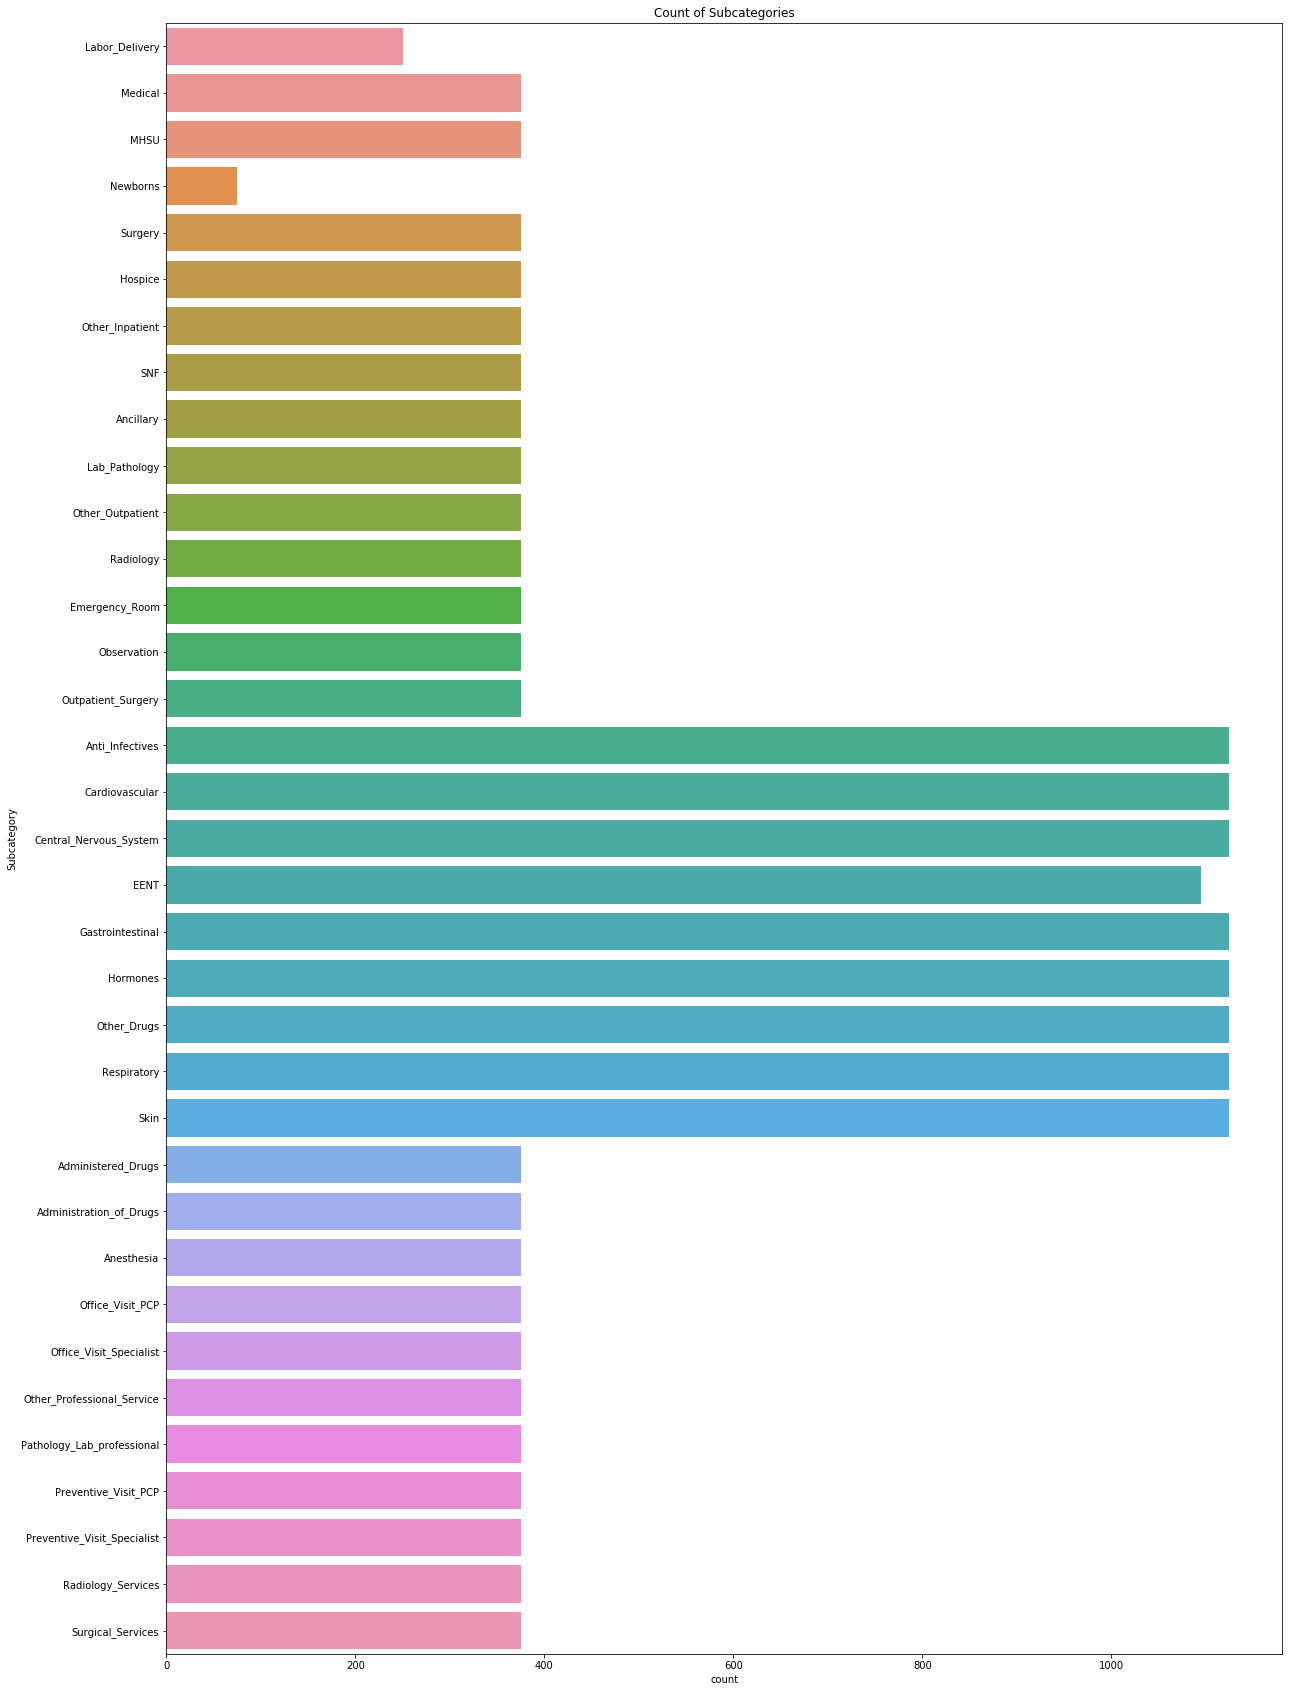

In [812]:
sns.countplot(y='High-Level Category', data=df)
plt.title('Count of High-Level Categories')
plt.show()

sns.countplot(y='Mid-Level Category', data=df)
plt.title('Count of Mid-Level Categories')
plt.show()

# Need a longer size for this one
plt.figure(figsize=(20, 30))

sns.countplot(y='Subcategory', data=df)
plt.title('Count of Subcategories')
plt.show()

In [813]:
# TODO (maybe): Repeat above using Bokeh, with drop-down to select category type field.


## Focus on prescription drug spending and costs

Prescription drug costs are a topic of much debate and interest in the U.S. so for this exercise I'll choose to examine drug spending and prices by subcategory (ignoring brand vs. generics).

In [814]:
# Filter out irrelevant rows
rx_df = df[df['High-Level Category'] == 'Prescription_Drugs']
rx_df = rx_df.drop(['High-Level Category', 'Mid-Level Category'], axis=1)
rx_df.head()

,Subcategory,Age Group,Metric,Year,Value,Age Group Upper
8625,Anti_Infectives,Ages_0to18,OOP_spending_per_person,2012,3.8639,18
8626,Anti_Infectives,Ages_0to18,OOP_spending_per_person,2013,4.3137,18
8627,Anti_Infectives,Ages_0to18,OOP_spending_per_person,2014,4.4565,18
8628,Anti_Infectives,Ages_0to18,OOP_spending_per_person,2015,4.0359,18
8629,Anti_Infectives,Ages_0to18,OOP_spending_per_person,2016,3.3667,18


## Tidy the data

The data is not in tidy form, so let's reorganize the variables and observations properly. The `Metric` column contains variables so I'll convert them into their own columns.  The `Value` column contains observations.

In [815]:
rx_df_tidy = rx_df.pivot_table(index=['Subcategory', 'Age Group Upper'],
                         columns='Metric',
                         values='Value', aggfunc=np.mean)
print(rx_df_tidy.shape)
rx_df_tidy.head()

(45, 5)


Metric                           OOP_spending_per_person  \
Subcategory     Age Group Upper                            
Anti_Infectives 18                              4.591798   
                25                              3.644387   
                44                              4.986502   
                54                              5.995580   
                64                              5.925876   

Metric                           Payer_spending_per_person      Price  \
Subcategory     Age Group Upper                                         
Anti_Infectives 18                                9.950180  15.283393   
                25                               12.496813  22.304760   
                44                               24.640396  25.100262   
                54                               47.081622  27.530529   
                64                               60.117527  38.814040   

Metric                           Spending_per_person  \
Subcategory     Age Group Upper                        
Anti_Infectives 18                         14.541967   
                25                         16.141211   
                44                         29.626907   
                54                         53.077200   
                64                         66.043409   

Metric                           Utilization_per_1000_persons  
Subcategory     Age Group Upper                                
Anti_Infectives 18                                3183.458800  
                25                                3001.677129  
                44                                3923.365347  
                54                                5100.879433  
                64                                5615.538631

In [816]:
rx_df_tidy.reset_index(inplace=True)
print(rx_df_tidy.shape)
rx_df_tidy.head()

(45, 7)


Metric,Subcategory,Age Group Upper,OOP_spending_per_person,Payer_spending_per_person,Price,Spending_per_person,Utilization_per_1000_persons
0,Anti_Infectives,18,4.591798,9.950180,15.283393,14.541967,3183.458800
1,Anti_Infectives,25,3.644387,12.496813,22.304760,16.141211,3001.677129
2,Anti_Infectives,44,4.986502,24.640396,25.100262,29.626907,3923.365347
3,Anti_Infectives,54,5.995580,47.081622,27.530529,53.077200,5100.879433
4,Anti_Infectives,64,5.925876,60.117527,38.814040,66.043409,5615.538631


## Look for correlations

In [817]:
rx_df_tidy.corr()

Metric,Age Group Upper,OOP_spending_per_person,Payer_spending_per_person,Price,Spending_per_person,Utilization_per_1000_persons
Metric,,,,,,
Age Group Upper,1.000000,0.528286,0.520950,0.137139,0.543644,0.483807
OOP_spending_per_person,0.528286,1.000000,0.734430,0.023121,0.813299,0.975023
Payer_spending_per_person,0.520950,0.734430,1.000000,0.173046,0.992201,0.643845
Price,0.137139,0.023121,0.173046,1.000000,0.152601,-0.071591
Spending_per_person,0.543644,0.813299,0.992201,0.152601,1.000000,0.731052
Utilization_per_1000_persons,0.483807,0.975023,0.643845,-0.071591,0.731052,1.000000


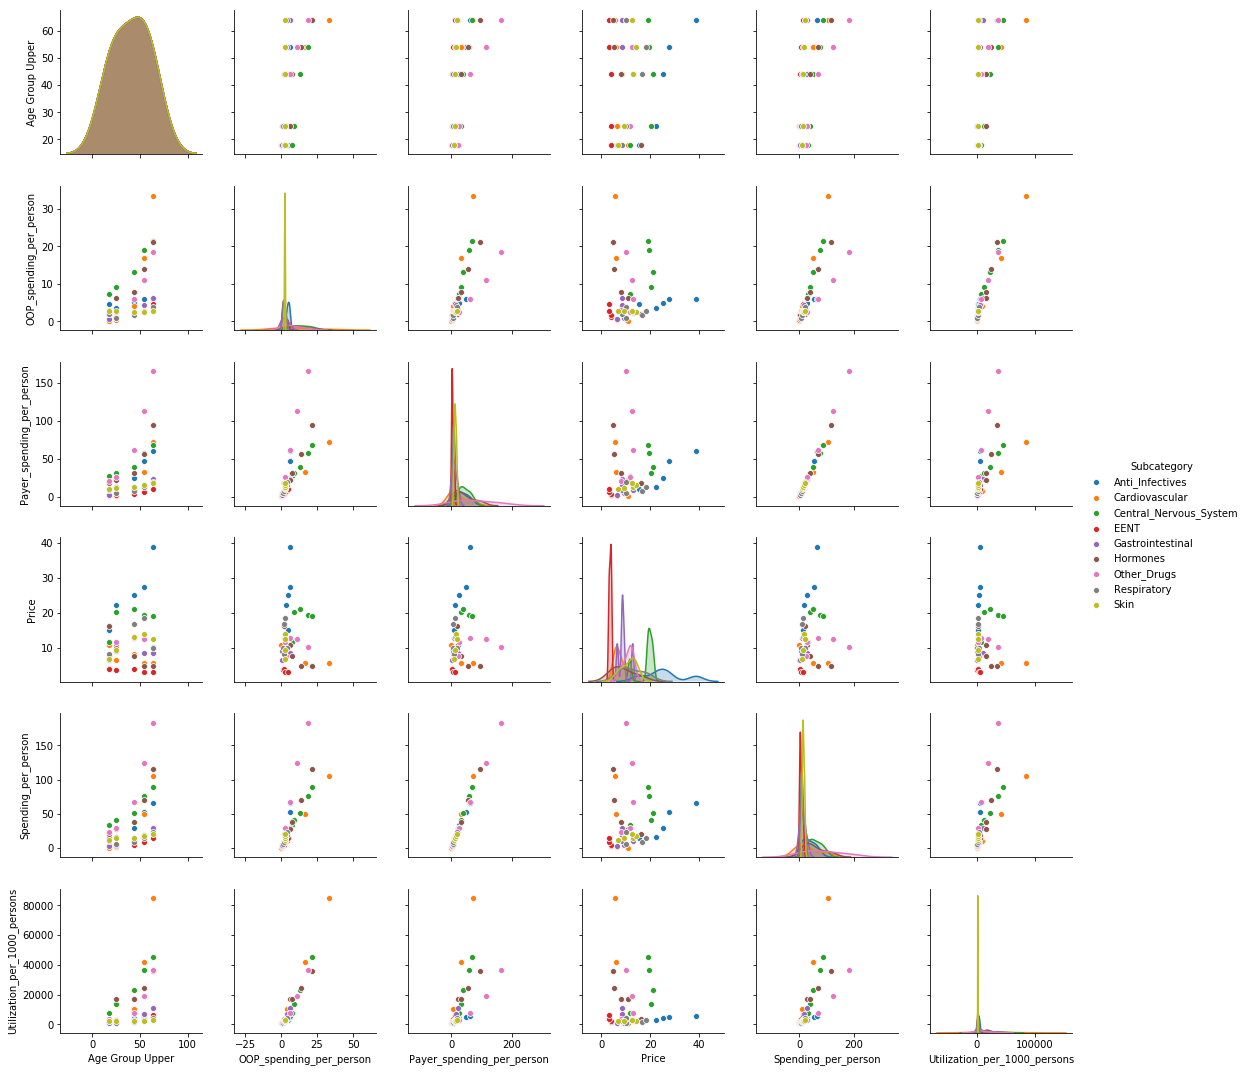

In [818]:
sns.pairplot(rx_df_tidy, hue='Subcategory')
plt.show()

### Correlation findings

As confirmed in the correlations, 'Spending_per_person' is the sum of 'OOP_spending_per_person' and 'Payer_spending_per_person', so let's remove them.

The relevant metrics I'll pay attention to,  are:
- 'Spending_per_person' (the total of 'OOP_spending_per_person' and 'Payer_spending_per_person')
- 'Price'

In [819]:
rx_df_tidy.drop(labels=['OOP_spending_per_person', 'Payer_spending_per_person'], axis=1, inplace=True)
rx_df_tidy.head()

Metric,Subcategory,Age Group Upper,Price,Spending_per_person,Utilization_per_1000_persons
0,Anti_Infectives,18,15.283393,14.541967,3183.458800
1,Anti_Infectives,25,22.304760,16.141211,3001.677129
2,Anti_Infectives,44,25.100262,29.626907,3923.365347
3,Anti_Infectives,54,27.530529,53.077200,5100.879433
4,Anti_Infectives,64,38.814040,66.043409,5615.538631


# Visualizations

Now that we have a clean and tidy data set let's visualize the data for insights!

1. spending by age group. Insight: goes up as you get older?
   - dymnamic: drop-down to select subcategory
1. spending by subcategory. Insight: Highlight top areas of spending
   - dymnamic: slider by age
1. utilization by subcategory or age. Insight: ??
   - dymnamic: slider to select other dimension

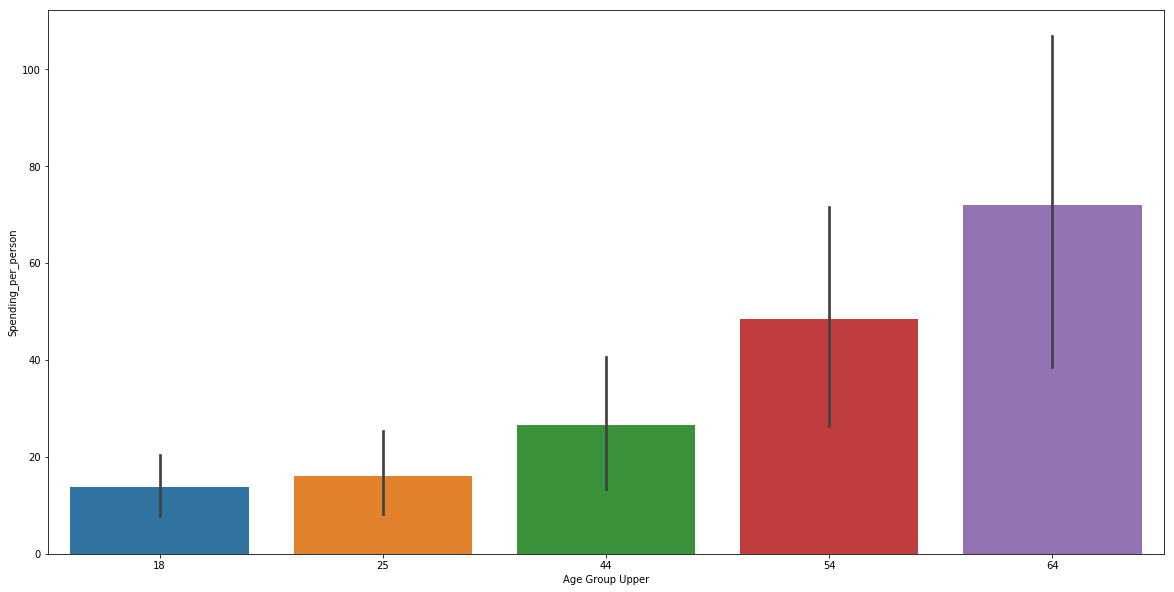

In [825]:
sns.barplot(x='Age Group Upper', y='Spending_per_person', data=rx_df_tidy)
plt.show()

# TODO improvement: show % change as annotations :) 

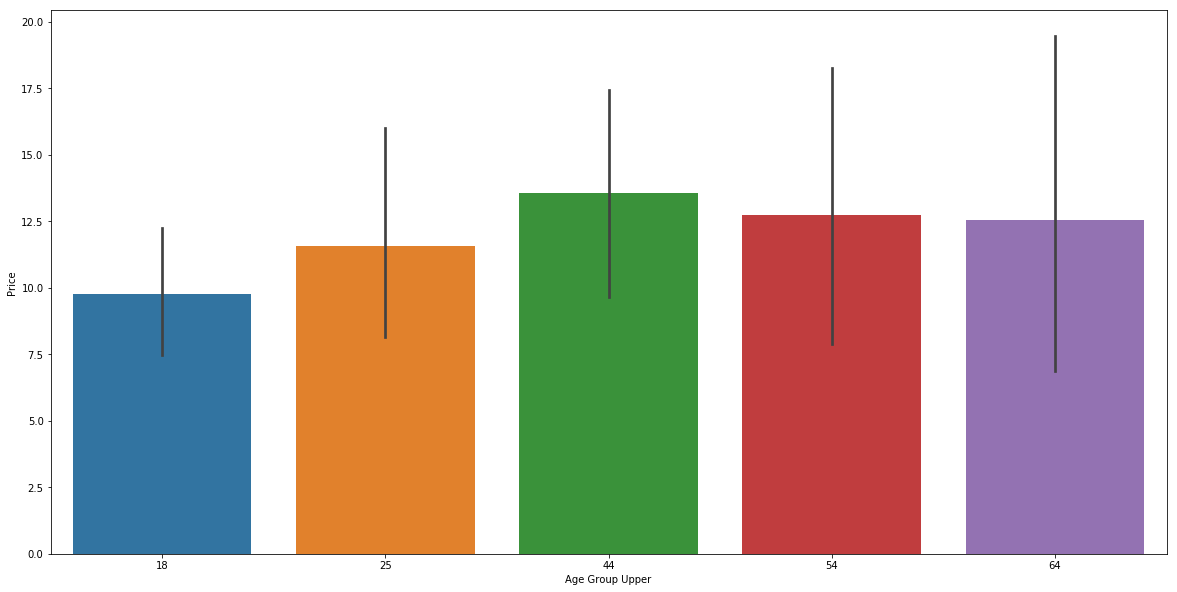

In [830]:
sns.barplot(x='Age Group Upper', y='Price', data=rx_df_tidy)
plt.show()

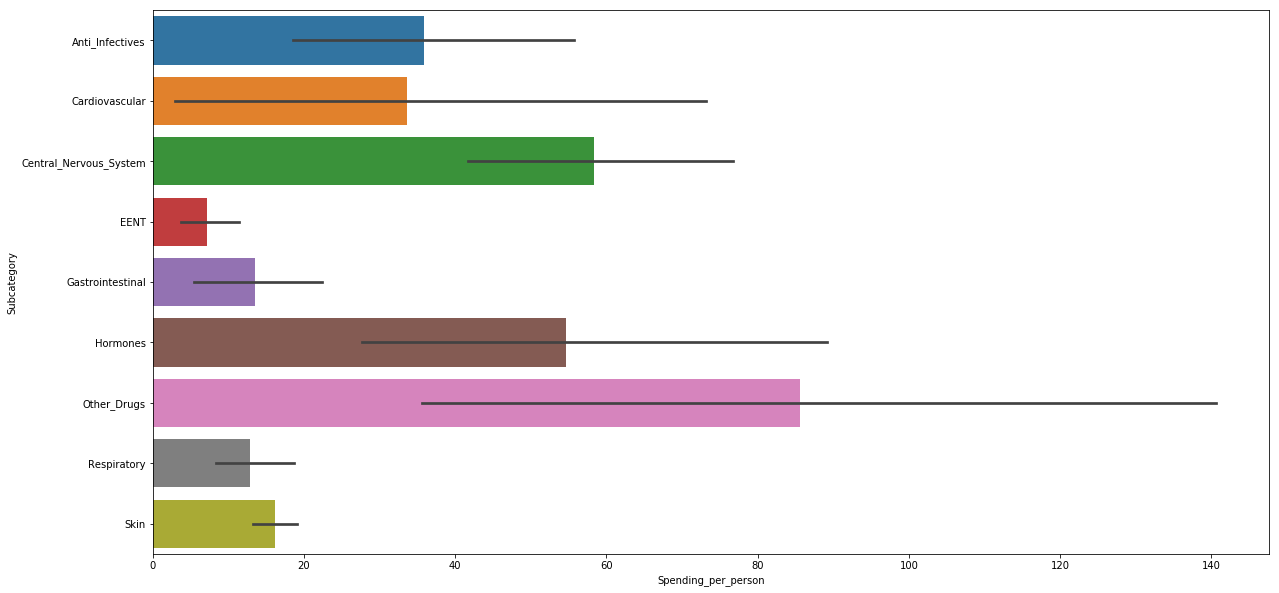

In [826]:
sns.barplot(x='Spending_per_person', y='Subcategory', data=rx_df_tidy)
plt.show()

# TODO: Sort ascending

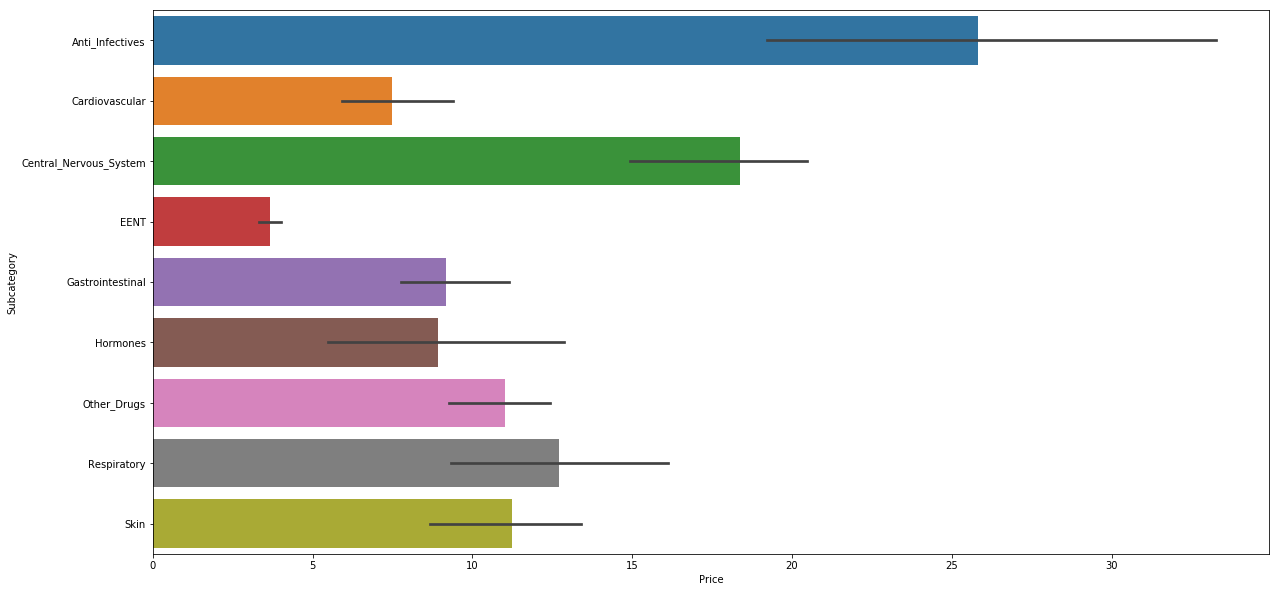

In [831]:
sns.barplot(x='Price', y='Subcategory', data=rx_df_tidy)
plt.show()

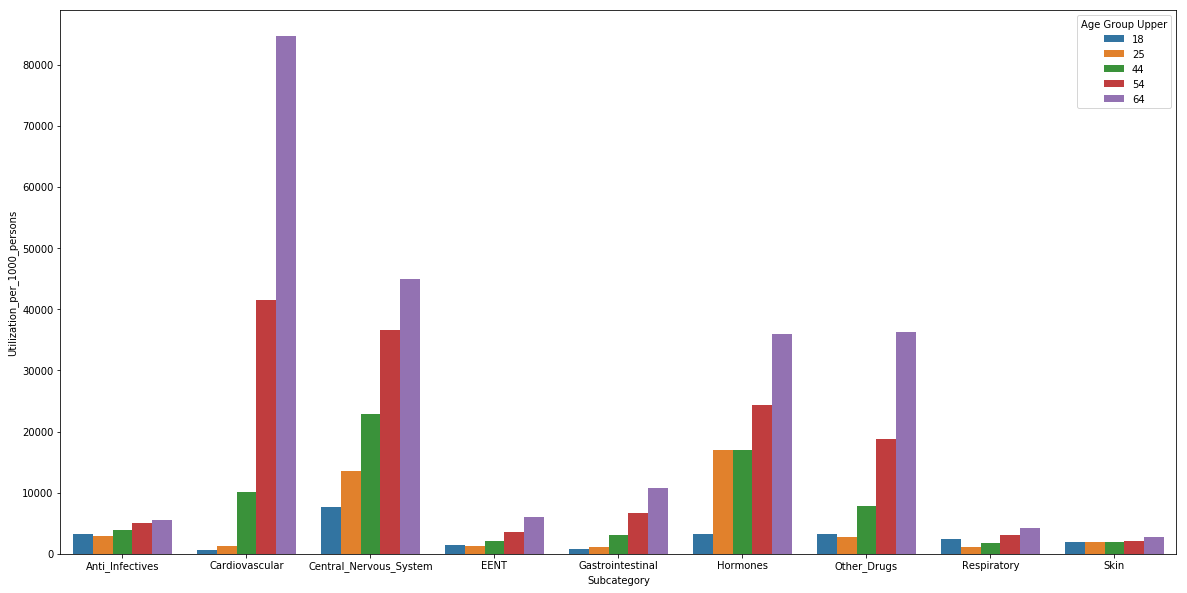

In [829]:
sns.barplot(x='Subcategory', y='Utilization_per_1000_persons', hue='Age Group Upper', data=rx_df_tidy)
plt.show()

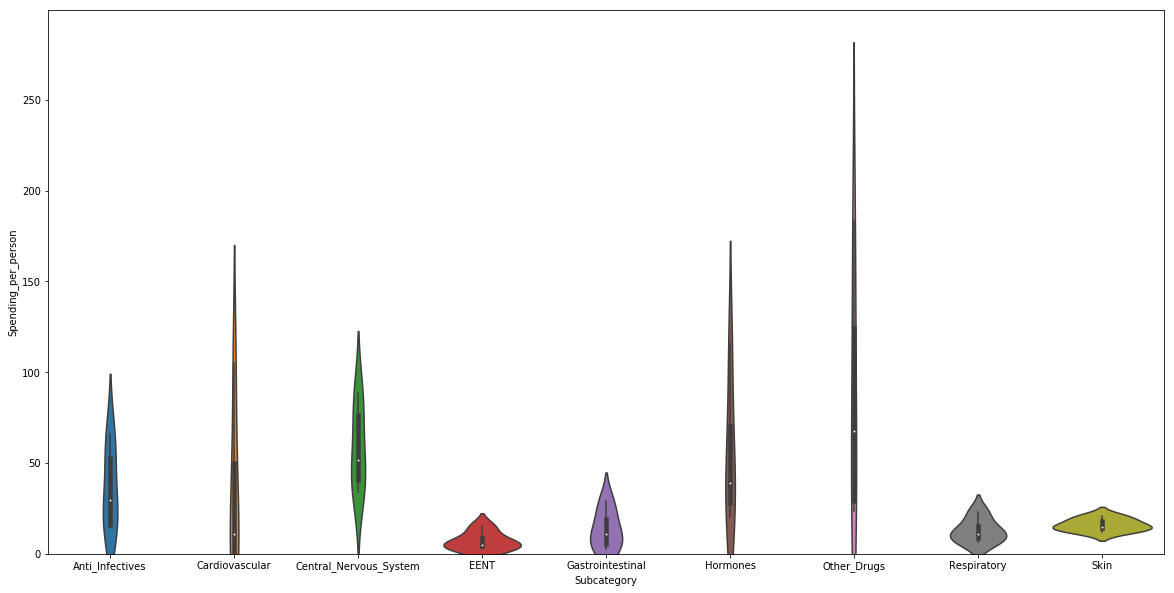

In [835]:
sns.violinplot(x='Subcategory', y='Spending_per_person', data=rx_df_tidy)
#sns.swarmplot(x='Subcategory', y='Utilization_per_1000_persons', data=rx_df_tidy, color="w", alpha=.5)
plt.axis(ymin=0)
plt.show()

# Write-up: Static vs dynamic representations

Static data visualizations are preferable when:
- You want to communicate a specific insight
- You want to tell a story by guiding the audience through a sequence of insights

Dynamic visualizations are better when:
- You want to provide users flexibility in exploring the data
- You don't know the insights in advance and want to enable the user to discover them